<a href="https://colab.research.google.com/github/filipesartori/Segmenta-oPython/blob/main/Segmenta%C3%A7%C3%A3o_baseada_em_cores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp -R /content/gdrive/MyDrive/Colab\ Notebooks/Segmentação\ Python/imagens/ imagens/

In [4]:
def mostrar(imagem):
  fig = plt.gcf()
  fig.set_size_inches(18,6)
  plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB), cmap='gray')
  plt.axis('off')
  plt.show()

**Segmentação por cores**


com RGB e Uma cor

In [5]:
img = cv2.imread('/content/imagens/cubo_magico.jpg')

In [8]:
cor_min = (90, 10, 0)
cor_max = (255, 180, 40)
maximo = np.array(cor_max, dtype='uint8')
minimo = np.array(cor_min, dtype='uint8')

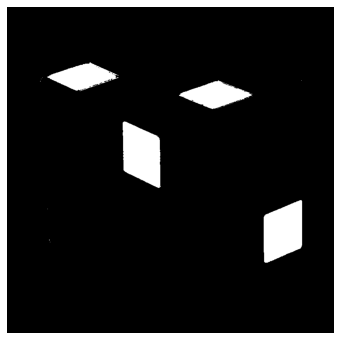

In [9]:
mascara = cv2.inRange(img, cor_min, cor_max)
mostrar(mascara)

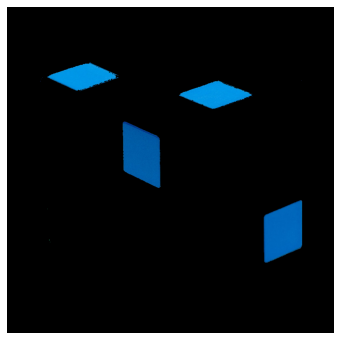

In [10]:
segmenta_cor = cv2.bitwise_and(img, img, mask = mascara)
mostrar(segmenta_cor)

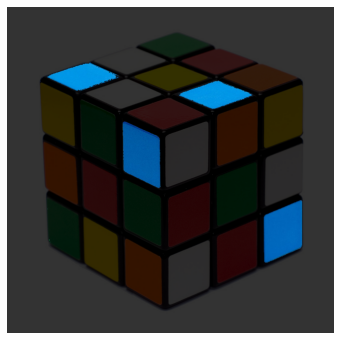

In [11]:
seg_sobreposicao = cv2.addWeighted(segmenta_cor, 0.8, img, 0.2, 0)
mostrar(seg_sobreposicao)

Várias cores

In [12]:
cores = [
    ([90,10,0], [255,180,40]),     #azul
    ([0,80,0], [120, 255, 120]),   #verde 
    ([8,8,160], [120,120,255]),    #vermelho  
    ([0,150,200], [10,255,255]),   #amarelo 
    ([0,80,240], [80,165,255]),    #laranja 
]

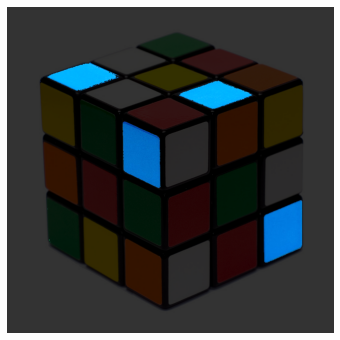

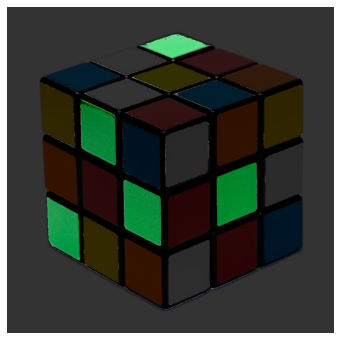

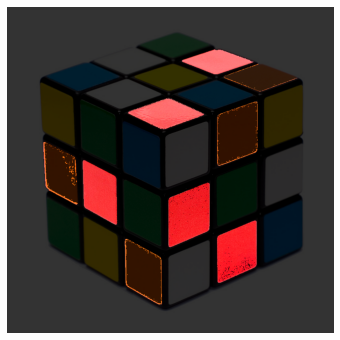

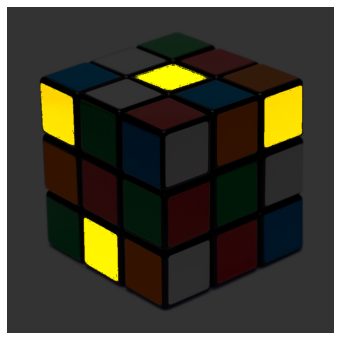

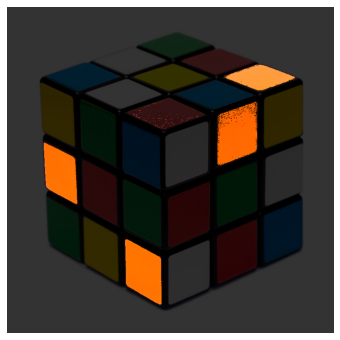

In [15]:
for (minimo, maximo) in cores:
  minimo = np.array(minimo, dtype='uint8')
  maximo = np.array(maximo, dtype='uint8')
  mascara = cv2.inRange(img, minimo, maximo) 
  segmento = cv2.bitwise_and(img, img, mask = mascara)
  seg_sobreposicao = cv2.addWeighted(segmento, 1, img, 0.2, 0)
  mostrar(seg_sobreposicao)

Segmentação em HSV

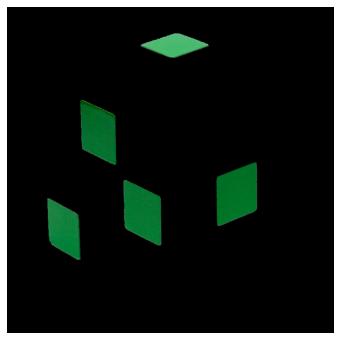

In [19]:
img = cv2.imread('/content/imagens/cubo_magico.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
minimo = (45, 80, 40)
maximo = (75, 255, 255)
mascara = cv2.inRange(img_hsv, minimo, maximo)
segmento = cv2.bitwise_and(img, img, mask = mascara)
mostrar(segmento)

In [20]:
img = cv2.imread('/content/imagens/limao_amarelo.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [23]:
cores_pixels = img.reshape((np.shape(img)[0] * np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1, vmax=1)
norm.autoscale(cores_pixels)
cores_pixels = norm(cores_pixels).tolist()

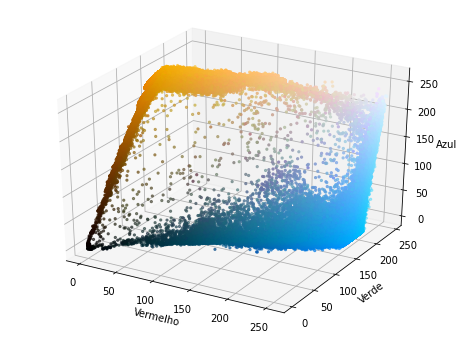

In [24]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(rgb)
fig = plt.figure()
fig.set_size_inches(8, 6)
axis = fig.add_subplot(1,1,1, projection='3d')
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=cores_pixels, marker = '.')
axis.set_xlabel('Vermelho')
axis.set_ylabel('Verde')
axis.set_zlabel('Azul');

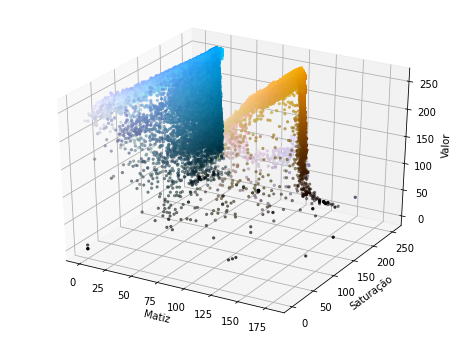

In [25]:
h, s, v = cv2.split(img_hsv)
fig = plt.figure()
fig.set_size_inches(8, 6)
axis = fig.add_subplot(1,1,1, projection='3d')
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=cores_pixels, marker = '.')
axis.set_xlabel('Matiz')
axis.set_ylabel('Saturação')
axis.set_zlabel('Valor');